<a href="https://colab.research.google.com/github/Pras89tyo/TA/blob/main/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
train_dir = '/content/drive/MyDrive/potato_leaf_disease/Training'
val_dir = '/content/drive/MyDrive/potato_leaf_disease/Validation'

Mounted at /content/drive


In [3]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [4]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2998s 29s/step - accuracy: 0.3725 - loss: 1.8698 - val_accuracy: 0.3990 - val_loss: 0.9452
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2942s 29s/step - accuracy: 0.4691 - loss: 0.9584 - val_accuracy: 0.6034 - val_loss: 0.8926
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2935s 29s/step - accuracy: 0.5089 - loss: 0.9048 - val_accuracy: 0.7740 - val_loss: 0.7738
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2944s 29s/step - accuracy: 0.5416 - loss: 0.8711 - val_accuracy: 0.8654 - val_loss: 0.7152
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 2847s 28s/step - accuracy: 0.5722 - loss: 0.8337 - val_accuracy: 0.8029 - val_loss: 0.7472


In [7]:
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

13/13 ━━━━━━━━━━━━━━━━━━━━ 327s 25s/step


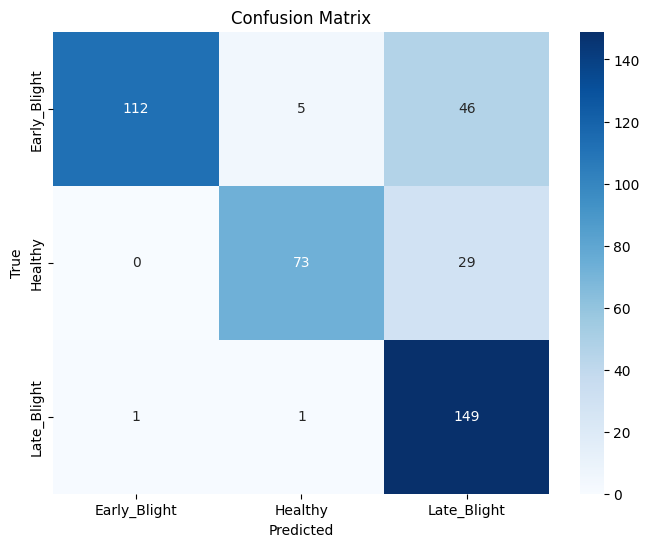

In [8]:
labels = list(val_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

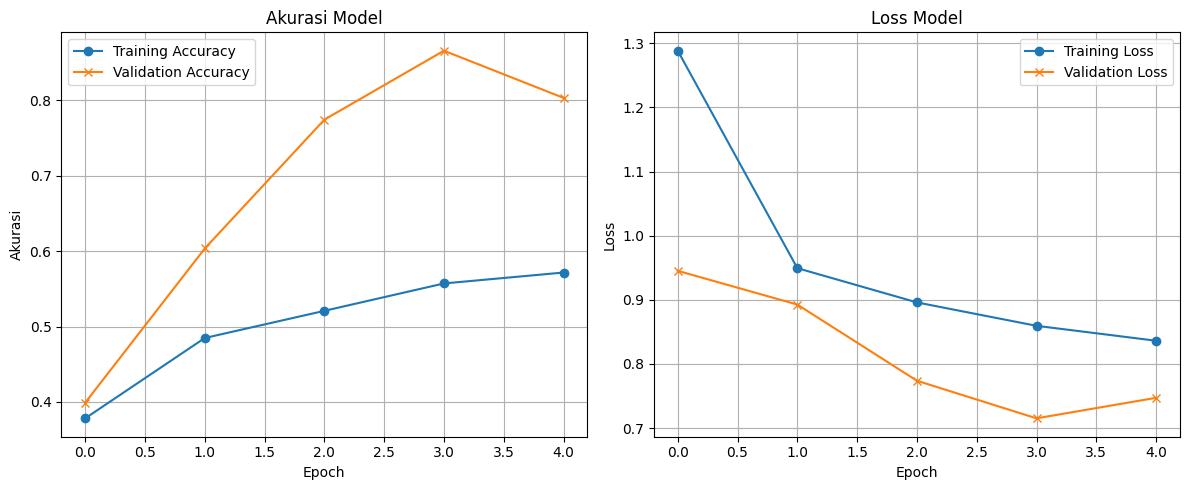

In [9]:
# Step 6.2: Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

Early_Blight       0.99      0.69      0.81       163
     Healthy       0.92      0.72      0.81       102
 Late_Blight       0.67      0.99      0.79       151

    accuracy                           0.80       416
   macro avg       0.86      0.80      0.80       416
weighted avg       0.86      0.80      0.80       416



In [11]:
model.save('/content/vgg19_potato_model.h5')
print("Model berhasil disimpan sebagai vgg19_potato_model.h5")

Model berhasil disimpan sebagai vgg19_potato_model.h5
